# Activity 3 - Wine TSNE - Iteration

In this exercise we will reinforce our knowledge of t-SNE using the Wine dataset and the influence on iterations on the dataset.  The Wine dataset (https://archive.ics.uci.edu/ml/datasets/Wine) is a collection of various attributes of Wine such as alcohol content, color and hue along with class labels of each wine type.  There are 3 available class labels: 1, 2 and 3.

Import pandas, numpy, matplotlib, and the t-SNE and PCA models from scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Load the Wine dataset and inspect the first 5 rows

In [2]:
df = pd.read_csv('wine.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


The first column provides the labels, extract these from the DataFrame and store them in a separate variable.  Ensure the column is removed from the DataFrame.

In [3]:
labels = df[0]

del df[0]

Execute PCA on the dataset and extract the first 6 components

In [4]:
model_pca = PCA(n_components=6)
wine_pca = model_pca.fit_transform(df)
wine_pca = wine_pca.reshape((len(wine_pca), -1))

Construct a loop that iterates through the following iteration values (250, 500, 1000).  For each loop, generate a t-SNE model with the correpsonding number of iterations and identical number of iterations without progress values.  Construct a scatter plot of the wine classes labelled.  Notice the effect of different iteration values.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 9.207049
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.930435
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 9.207049
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.930435
[t-SNE] KL divergen

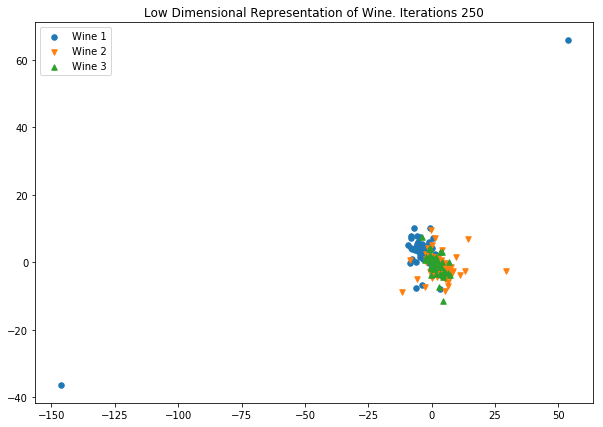

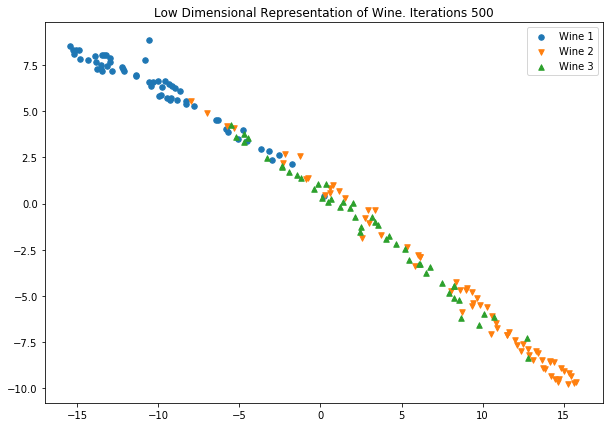

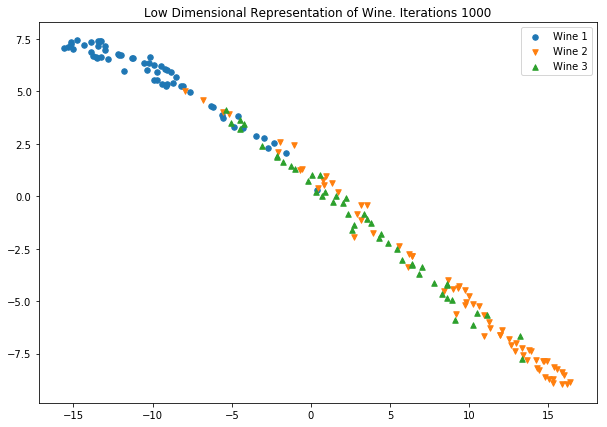

In [5]:
MARKER = ['o', 'v', '^',]

for iterations in [250, 500, 1000]:
    model_tsne = TSNE(random_state=0, verbose=1, n_iter=iterations, n_iter_without_progress=iterations)
    wine_tsne = model_tsne.fit_transform(wine_pca)

    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of Wine. Iterations {iterations}');
    for i in range(1, 4):
        selections = wine_tsne[labels == i]
        plt.scatter(selections[:,0], selections[:,1], marker=MARKER[i-1], label=f'Wine {i}', s=30);
        plt.legend();